<a href="https://colab.research.google.com/github/ZijianDu/C-in-C-KPI/blob/main/KPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
# main ML framework
import sklearn
import csv
# mount drive for data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
df_down = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ellipse/down.csv")
del df_down['Unnamed: 35']
df_down.head(10)

,index,small_cx,small_cy,small_a,small_b,small_angle,small_cx_gt,small_cy_gt,small_a_gt,small_b_gt,...,3*stdInner,3*stdOuter,st.dev.from EllipseInner,st.dev.from EllipseOuter,avGradInner_to_max,avGradOuter_to_max,sigmaGradInner,sigmaGradOuter,innerGoodPixels,outerGoodPixels
0,1,155.490952,224.847855,58.643986,41.830204,86.159714,153.204689,186.961125,29.451965,31.596504,...,15.209413,22.267916,6.887875,8.938169,0.248290,0.247781,0.191274,0.225836,0.385783,0.164375
1,2,311.334229,225.160049,59.150776,44.367500,86.768188,309.204689,186.961125,30.129956,31.221591,...,14.465426,33.107399,6.270432,13.095271,0.247592,0.274293,0.191738,0.217389,0.371009,0.158120
2,3,467.574524,223.574295,59.321507,42.315926,85.799232,465.204689,186.961125,30.787500,32.172203,...,14.142763,35.690300,6.200739,14.468878,0.249610,0.276901,0.196715,0.223948,0.436336,0.186164
3,4,623.546143,224.731659,59.327309,42.463478,85.744385,621.204689,186.961125,30.400091,30.569618,...,12.030594,35.577065,5.524440,13.486585,0.238429,0.284357,0.185637,0.212927,0.379924,0.171081
4,5,778.940613,223.551132,59.024612,41.705078,87.129601,777.204689,186.961125,30.930906,32.842299,...,16.115751,20.899221,7.290905,8.957928,0.253485,0.267439,0.196682,0.234504,0.424137,0.179873
5,6,935.166382,223.583557,57.807800,40.992836,86.468277,933.204689,186.961125,30.807192,31.443806,...,16.144447,28.489460,7.410555,10.937725,0.231514,0.272197,0.183952,0.230711,0.408004,0.210214
6,7,1090.486328,227.439636,54.446888,41.258221,79.483452,1089.204689,186.961125,31.823507,31.999490,...,27.752071,30.315578,10.990743,12.000064,0.217117,0.281568,0.178638,0.235895,0.376239,0.159410
7,8,1247.027588,224.093079,60.517635,42.398586,86.283485,1245.204689,186.961125,31.470730,32.096012,...,12.463970,33.126427,5.581203,13.031818,0.245676,0.296539,0.199806,0.221421,0.412115,0.186876
8,9,1403.798218,223.870132,59.823879,41.884865,87.738548,1401.204689,186.961125,32.279191,33.701474,...,22.674829,27.077620,9.183358,10.625536,0.239462,0.294285,0.183290,0.221894,0.439000,0.208487
9,10,1559.762207,223.044418,59.208115,41.415028,87.436493,1557.204689,186.961125,32.717153,33.003129,...,18.078928,24.562725,8.261108,9.828841,0.224171,0.293125,0.182768,0.225609,0.449488,0.228635


In [105]:
# generate: small_e_gt, large_e_gt, small_e_features, large_e_features, small_e_IoU, large_e_IoU
all_columns = df_down.columns
print(all_columns)
small_ellipse_gt_columns = list(all_columns[1:11])
small_e_gt = df_down[small_ellipse_gt_columns]
small_e_target = df_down['IoU_small']
large_ellipse_gt_columns = list(all_columns[12:22])
large_e_gt = df_down[large_ellipse_gt_columns]
large_e_target = df_down['IoU_large']
small_e_features_columns = all_columns[23::2]
small_e_features = df_down[small_e_features_columns.to_list()]
large_e_features_columns = all_columns[24::2]
large_e_features = df_down[large_e_features_columns.to_list()]

Index(['index', 'small_cx', 'small_cy', 'small_a', 'small_b', 'small_angle',
       'small_cx_gt', 'small_cy_gt', 'small_a_gt', 'small_b_gt',
       'small_angle_gt', 'IoU_small', 'large_cx', 'large_cy', 'large_a',
       'large_b', 'large_angle', 'large_cx_gt', 'large_cy_gt', 'large_a_gt',
       'large_b_gt', 'large_angle_gt', 'IoU_large', 'FitConfidenceInner',
       'FitConfidenceOuter', '3*stdInner', '3*stdOuter',
       'st.dev.from EllipseInner', 'st.dev.from EllipseOuter',
       'avGradInner_to_max', 'avGradOuter_to_max', 'sigmaGradInner',
       'sigmaGradOuter', 'innerGoodPixels', 'outerGoodPixels'],
      dtype='object')


In [96]:
# train test split
from sklearn.model_selection import train_test_split 
seed = 1
small_e_train, small_e_test, small_e_gt_train, small_e_gt_test, small_e_IoU_train, small_e_IoU_test = train_test_split(
    small_e_features, small_e_gt, small_e_target, shuffle = True, test_size = 0.25, random_state = seed)
large_e_train, large_e_test, large_e_gt_train, large_e_gt_test, large_e_IoU_train, large_e_IoU_test = train_test_split(
    large_e_features, large_e_gt, large_e_target, shuffle = True, test_size = 0.25, random_state = seed)

In [149]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
# standardize all featuress
def standardize(small_e_features, large_e_features, small_e_target, large_e_target, minmax):
  small_e_features_normalized = pd.DataFrame(StandardScaler().fit_transform(small_e_features), columns = small_e_features_columns)
  large_e_features_normalized = pd.DataFrame(StandardScaler().fit_transform(large_e_features), columns = large_e_features_columns)
  small_e_target_normalized = pd.DataFrame(minmax.fit_transform(np.array(small_e_target.values).reshape(-1, 1)), columns = ['IoU_small'] )
  large_e_target_normalized = pd.DataFrame(minmax.fit_transform(np.array(large_e_target.values).reshape(-1, 1)), columns = ['IoU_large'] )
  return small_e_feature_normalized, large_e_features_normalized, small_e_target_normalized, large_e_target_normalized
small_e_features_normalized, large_e_features_normalized, small_e_target_normalized, large_e_target_normalized = standardize(
    small_e_features, large_e_features, small_e_target, large_e_target, minmax)

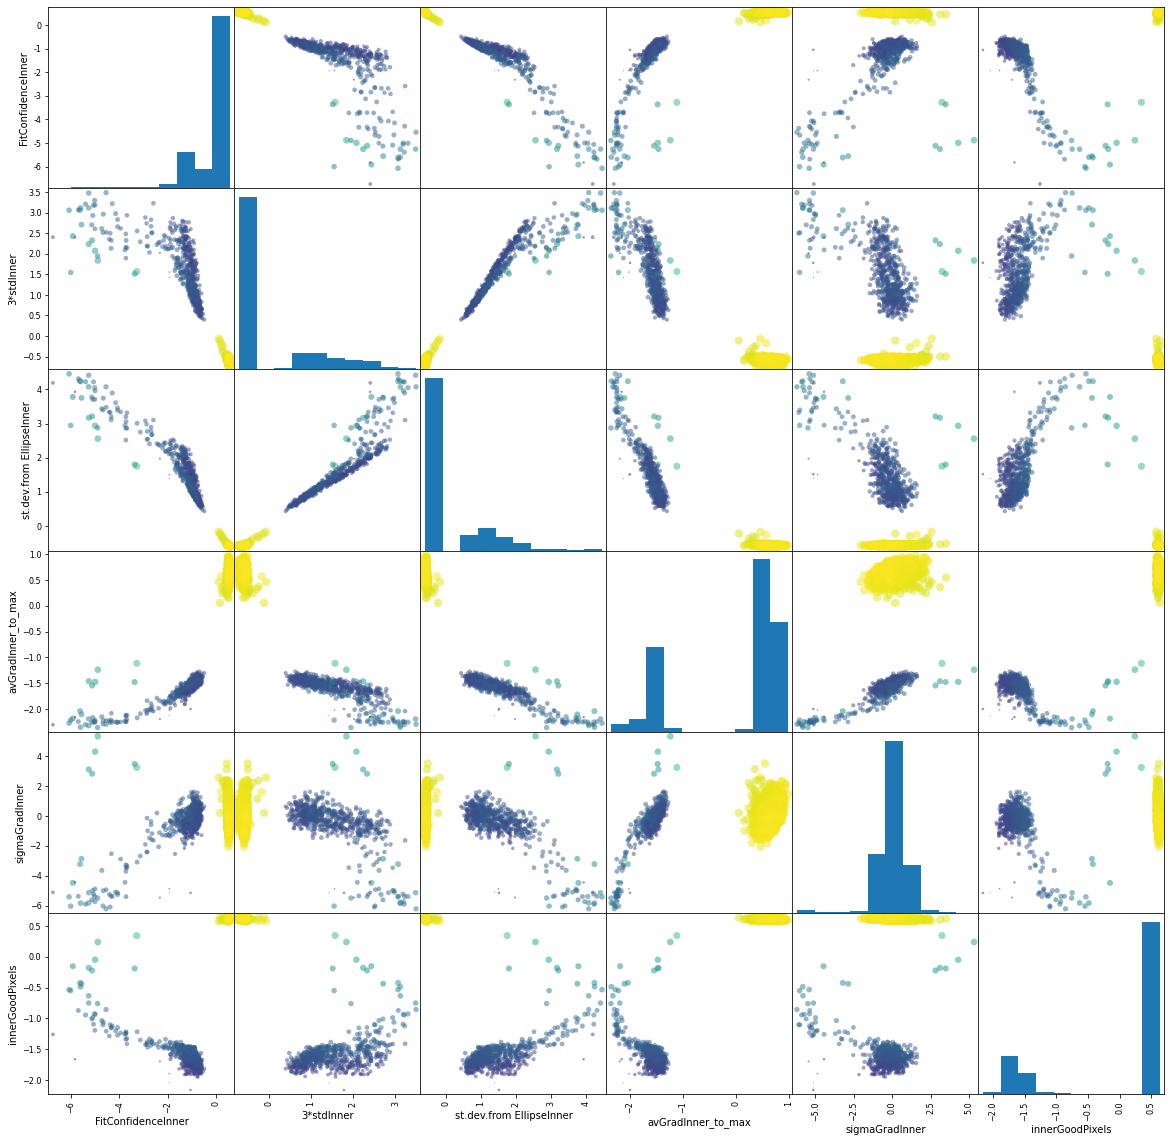

In [171]:
# visualize feature correlation for small ellipse
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.plotting.scatter_matrix(small_e_features_normalized, c = small_e_target_normalized.values, 
                           figsize = (20, 20), cmap = 'viridis', s = 300*small_e_target_normalized.values)
plt.show()

# build pipeline for preprocessing

In [ ]:
pipe_preprocessing1 = make_pipeline(StandardScaler())
pipe_preprocessing2 = make_pipeline(MinMaxScaler())